In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
pd.options.mode.chained_assignment = None  # default='warn' #done for waring in creating new routes(route_1,route_2)

In [ ]:
train_data = pd.read_excel("Data_Train.xlsx")

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [ ]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [ ]:
train_data["journey_month"]=train_data["Date_of_Journey"].dt.month
train_data["journey_day"]=train_data["Date_of_Journey"].dt.day

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-10-20 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-20 05:50:00,2022-10-20 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-20 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-10-20 18:05:00,2022-10-20 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-10-20 16:50:00,2022-10-20 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [ ]:
train_data.drop("Date_of_Journey",axis=1,inplace=True)

In [ ]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
def extract_min(df,col):
    df[col+'_min']=df[col].dt.minute
def drop_col(df,col):
    df.drop(col,axis=1,inplace=True)

In [ ]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_col(train_data,'Dep_Time')

In [ ]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_col(train_data,'Arrival_Time')

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
duration=list(train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split(" "))==2:
        pass
    else:
        if "h" in duration:
            duration[i]=duration[i] + " 0m"
        else:
            duration[i]="0h "+duration[i]

In [ ]:
train_data["Duration"]=duration

In [ ]:
def hour(x):
    return x.split(" ")[0][0:-1]
def minute(x):
    return x.split(" ")[1][0:-1]

In [ ]:
train_data["Duration_hours"]=train_data["Duration"].apply(hour)
train_data["Duration_mins"]=train_data["Duration"].apply(minute)

In [ ]:
drop_col(train_data,"Duration")

In [ ]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_month         int64
journey_day           int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hours       object
Duration_mins        object
dtype: object

In [ ]:
train_data["Duration_hours"]=train_data["Duration_hours"].astype(int)
train_data["Duration_mins"]=train_data["Duration_mins"].astype(int)

In [ ]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_month         int64
journey_day           int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hours        int64
Duration_mins         int64
dtype: object

In [ ]:
cat_col=[i for i in train_data.columns if train_data[i].dtypes=="O"] #"O" specifies object data type || cat_col contains all categorical data ie of type string
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
count_col=[i for i in train_data.columns if train_data[i].dtypes!="O"] #"O" specifies object data type || count_col contains all non-categorical data ie of type numeric
count_col

['Price',
 'journey_month',
 'journey_day',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_mins']

In [ ]:
categorical=train_data[cat_col]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
categorical["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

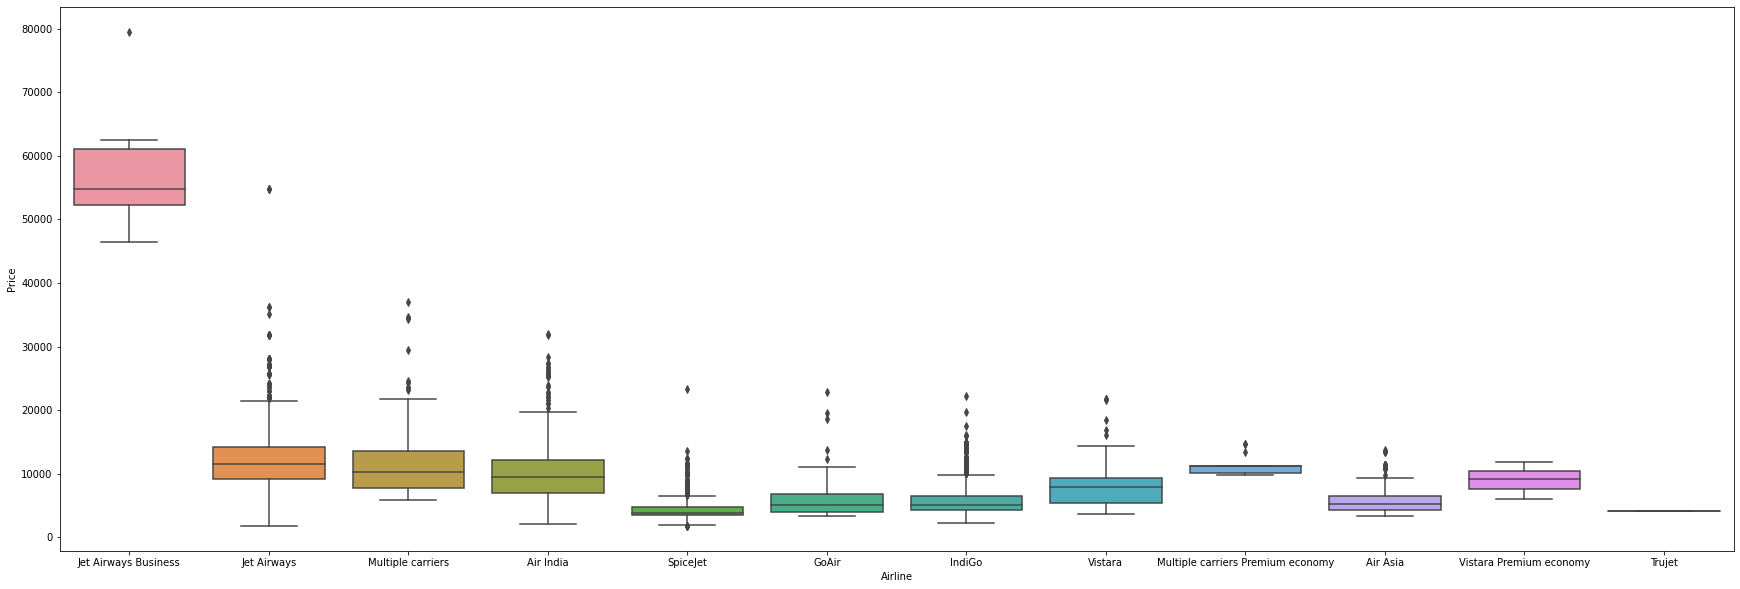

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(x="Airline",y="Price",data=train_data.sort_values("Price", ascending=False))

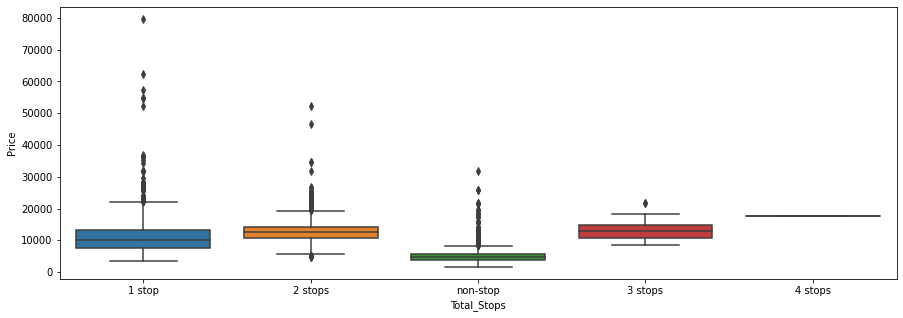

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Total_Stops",y="Price",data=train_data.sort_values("Price", ascending=False))

In [ ]:
Airline=pd.get_dummies(categorical["Airline"],drop_first=True) #Used for onehot encoding converting categorical data into number
                                                                #drop_first prevents repeatations

In [ ]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


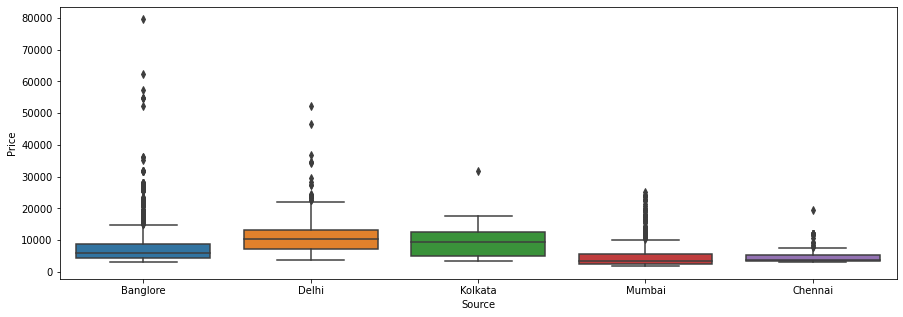

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Source",y="Price",data=train_data.sort_values("Price", ascending=False))

In [ ]:
Source=pd.get_dummies(categorical["Source"],drop_first=True) 
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


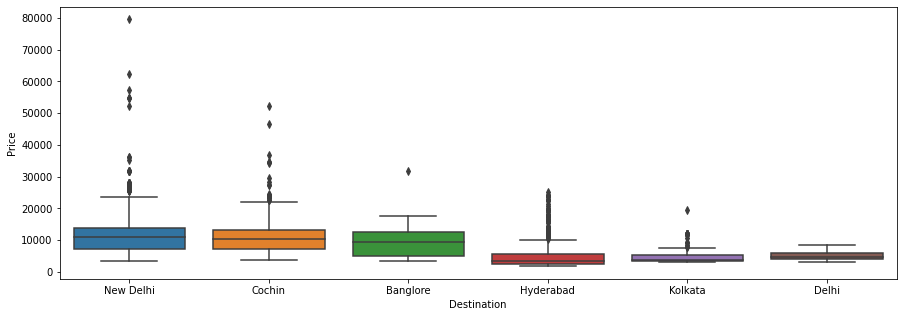

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Destination",y="Price",data=train_data.sort_values("Price", ascending=False))

In [ ]:
Destination=pd.get_dummies(categorical["Destination"],drop_first=True) 
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
categorical["Route_1"]=categorical["Route"].str.split("→").str[0]      #first str is to convert route which is of series
categorical["Route_2"]=categorical["Route"].str.split("→").str[1]      #second str is to convert list back to str as 
categorical["Route_3"]=categorical["Route"].str.split("→").str[2]      #econding is performed on str datatype
categorical["Route_4"]=categorical["Route"].str.split("→").str[3] 
categorical["Route_5"]=categorical["Route"].str.split("→").str[4] 

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
drop_col(categorical,"Route")

In [ ]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [ ]:
for i in ["Route_3","Route_4","Route_5"]:
    categorical[i].fillna("None",inplace=True)

In [ ]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [ ]:
for i in categorical.columns:                               #done for checking which col has how many categories
    print("{} has total {} categories".format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder  #bcoz route_1,route_2 have way too many categories onehot encoding is not viable
                                                #thus labeleconding need to used 

In [ ]:
encoder=LabelEncoder() #intialinzing encoder

In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [ ]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [ ]:
drop_col(categorical,"Additional_Info")   #bcoz most cols have no info so its basically useless for algo

In [ ]:
categorical["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
dic={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
categorical["Total_Stops"]=categorical["Total_Stops"].map(dic) #label encoding || can also be done usnig scikitlearn

In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [ ]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[count_col]],axis=1) #merging all diffrent datasets
                                                                                        #into final dataset

In [ ]:
data_train.head()   #all str features are back again so we delete them again

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,9,6,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,1,3,16,50,21,35,4,45


In [ ]:
drop_col(data_train,"Airline")
drop_col(data_train,"Source")
drop_col(data_train,"Destination")

In [ ]:
data_train.head() 

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,3,24,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,9,6,9,25,4,25,0,19
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,1,3,16,50,21,35,4,45


In [ ]:
pd.set_option("display.max_columns",35)  #to display all columns when head is called
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,3,24,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,0,19
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [ ]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


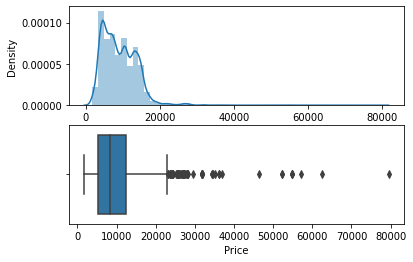

In [ ]:
plot(data_train,"Price")

In [ ]:
data_train["Price"]=np.where(data_train["Price"]>=40000,data_train["Price"].median(),data_train["Price"])
#replacing outliers(Values>40000) with median final arg specifies to do nothing if price is less than 40000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


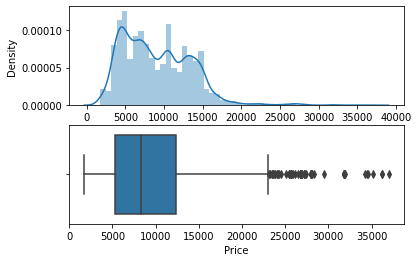

In [ ]:
plot(data_train,"Price") #changed distribution

In [ ]:
X=data_train.drop("Price",axis=1)  #dropping price as it is dependent var and needs to be predicted

In [ ]:
X.head() #X contains all independent vars

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_month,journey_day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,24,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,9,25,4,25,0,19
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,16,50,21,35,4,45


In [ ]:
y=data_train["Price"]
y.head()  #y has dependent var

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [ ]:
from sklearn.feature_selection import mutual_info_classif  #for selecting features that contribute most to the prediction
#mutual_info_classif is for calculating information gain

In [ ]:
mutual_info_classif(X,y)

array([2.12338425, 2.06510816, 2.79430798, 2.30017925, 1.45630678,
       0.7223886 , 0.76182765, 0.09432446, 0.65549105, 0.91301245,
       0.0119608 , 0.54851953, 0.020532  , 0.33392911, 0.        ,
       0.2384188 , 0.        , 0.17664549, 1.56254126, 0.90416896,
       0.26253647, 1.48979573, 0.40069518, 0.3073944 , 0.1657401 ,
       0.37996707, 0.88034428, 1.07154615, 1.42720802, 1.2194033 ,
       1.82897597, 1.54308712, 1.6894801 , 1.17877526])

In [ ]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)  #create a new dataframe with importance of each feature
imp                                                         #importance depends upon information gain

,0
Total_Stops,2.178651
Route_1,2.006289
Route_2,2.770557
Route_3,2.294449
Route_4,1.466580
Route_5,0.692888
Air India,0.758801
GoAir,0.115711
IndiGo,0.664612
Jet Airways,0.940690


In [ ]:
imp.columns=["importance"]  #assigning new name to importance col
imp.sort_values(by="importance",ascending=False)

,importance
Route_2,2.770557
Route_3,2.294449
Total_Stops,2.178651
Route_1,2.006289
Arrival_Time_hour,1.845667
Duration_hours,1.691632
Delhi,1.540380
Arrival_Time_min,1.538478
Cochin,1.537718
Route_4,1.466580


In [ ]:
#random forest -> collection of desicion trees
#descion trees have high variance(train data has high accuarcy and test data has low) so random forest is used to make use
#of multiple trees and reduce variance with the combined output
from sklearn.model_selection import train_test_split  #for splitting data into training and testing datasets
from sklearn import metrics                            #for error calculation

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)      #fit function is used to teach model about relationships b/w predicting and predictor vars
    print("Training Score: ",model.score(X_train,y_train))
    y_prediction=model.predict(X_test)      #predicting op of test dataset and storing them in y_prediction using model.predict()
    print("Prediction are: \n",y_prediction)
    print("\n")    #error calculation of model
    print("R2 score is: ",metrics.r2_score(y_test,y_prediction))
    print("MAE score is: ",metrics.mean_absolute_error(y_test,y_prediction))
    print("MSE score is: ",metrics.mean_squared_error(y_test,y_prediction))
    print("RMSE score is: ",np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)   #look at diff of values b/w test and predicted if distribution is normal model is good

In [ ]:
from sklearn.ensemble import RandomForestRegressor #for randomforest regression model

Training Score:  0.9536804999473614
Prediction are: 
 [ 8101.47        4507.45       14121.65316667 ... 12412.626
  4583.54666667  9975.18      ]


R2 score is:  0.8273413819217024
MAE score is:  1115.7481681679083
MSE score is:  3151148.4831427885
RMSE score is:  1775.14745391553


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


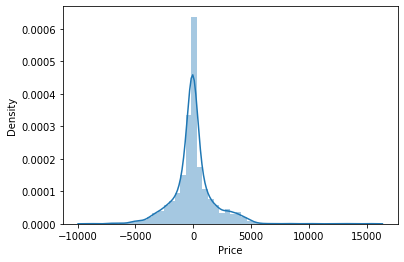

In [ ]:
predict(RandomForestRegressor())  #r2 score=accuracy

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor    #importing different models and predict using each

Training Score:  0.618794678469556
Prediction are: 
 [ 5692.03057873  4878.2742612  11160.89601094 ... 12360.05670393
  3884.6518101  12310.80401191]


R2 score is:  0.6028067579809184
MAE score is:  1932.4751385559864
MSE score is:  7249072.742696284
RMSE score is:  2692.4102107027234


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


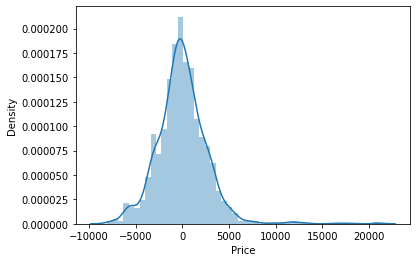

In [ ]:
predict(LinearRegression())

Training Score:  0.9674228012962408
Prediction are: 
 [ 7900.  4409. 14781. ... 10577.  4911.  9653.]


R2 score is:  0.7247085673739375
MAE score is:  1292.2075339260646
MSE score is:  5024273.853208028
RMSE score is:  2241.489204347866


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


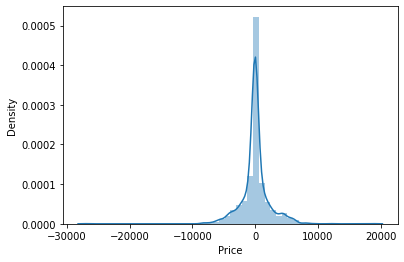

In [ ]:
predict(DecisionTreeRegressor())

Training Score:  0.7747717745735058
Prediction are: 
 [ 5249.4  4470.4 12668.6 ... 12761.8  4056.2 10377.8]


R2 score is:  0.6605938939254306
MAE score is:  1704.5426298549369
MSE score is:  6194414.4360131025
RMSE score is:  2488.858058631127


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


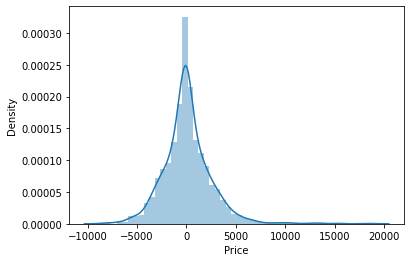

In [ ]:
predict(KNeighborsRegressor()) #random forest in best in this case bcoz it has highest accuracy